# **Nama : M.Nurdin Prastya.H**

# **NIM : 20507334047** 

# **AutoModel Arima for State of Charge Estimation of Lithium Polymer Battery**

# **PRE PROCESING DATA**

In [1]:
!pip install pmdarima

from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# supress warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.2 MB/s 
     |████████████████████████████████| 9.9 MB 48.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Mounted at /content/drive


# **LOAD DATA**

In [4]:
# load data
df = read_csv('/content/drive/MyDrive/Arima Kecerdasan buatan/socfix.txt',header=0, index_col=0, parse_dates= True )
series = df['OCV']
df.head()

,OCV
SOC,
100.000000,4.217655
99.998955,4.217641
99.997940,4.217627
99.996880,4.217613
99.995880,4.217598


**Keterangan**

Code di atas menggunakan fungsi **read_csv** dari library pandas untuk membaca file CSV yang berada di lokasi yang ditentukan. File CSV tersebut kemudian disimpan dalam variabel **df**. Kemudian, nilai dari kolom **'OCV'** dari df disimpan dalam variabel series. Setelah itu, fungsi **head()** digunakan untuk menampilkan 10 baris pertama dari df.

Fungsi **read_csv** memiliki beberapa parameter yang dapat Anda gunakan untuk mengontrol bagaimana file CSV dibaca:

**header:** Menentukan baris mana yang akan dijadikan sebagai nama kolom. Jika diatur ke 0, baris pertama akan dijadikan sebagai nama kolom.
**index_col:** Menentukan kolom mana yang akan dijadikan sebagai indeks. Jika diatur ke 0, kolom pertama akan dijadikan sebagai indeks.
**parse_dates:** Menentukan apakah indeks harus dikonversi ke tipe tanggal. Jika diatur ke True, indeks akan dikonversi ke tipe tanggal dan sebaliknya.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 43470 entries, 100.0 to 0.000221252441406
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OCV     43470 non-null  float64
dtypes: float64(1)
memory usage: 679.2 KB


**Keterangan**

Output di atas adalah informasi tentang objek DataFrame dari library pandas. Objek DataFrame merupakan representasi tabular dari data, yang terdiri dari baris dan kolom.

Output tersebut memberikan informasi tentang tipe data objek DataFrame (<class 'pandas.core.frame.DataFrame'>), indeks dari DataFrame (Float64Index: 43470 entries), serta kolom yang ada dalam DataFrame (Data columns (total 1 columns):).

Output juga memberikan informasi tentang jumlah baris yang tidak kosong untuk setiap kolom (non-null count) dan tipe data dari setiap kolom (dtypes).

Terakhir, output memberikan informasi tentang penggunaan memori dari objek DataFrame (memory usage: 679.2 KB). Ini berguna untuk mengetahui berapa banyak memori yang digunakan oleh objek DataFrame.

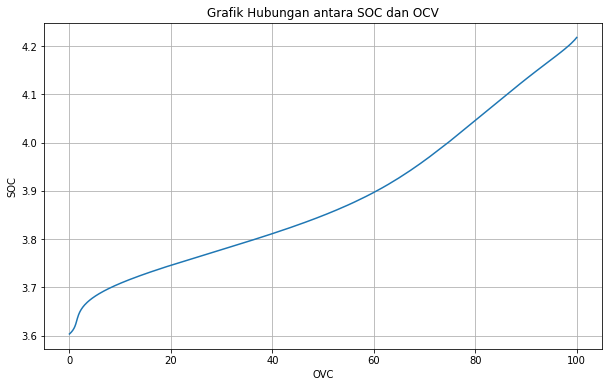

In [11]:
import matplotlib.pyplot as plt
# ploting data keseluruhan
plt.figure(figsize=(10, 6))
plt.plot(series)
plt.xlabel('OVC')
plt.ylabel('SOC')
plt.title('Grafik Hubungan antara SOC dan OCV')
plt.grid()
plt.show()

**PENJELASAN**

Dari hasil ploting diatas diketahui bahwa karakteristik data adalah *trend* yaitu pergerakan data yang stabil arahnya naik terus.

# **SPLIT DATA SET**

Disini saya membagi data menjadi dua yaitu untuk training dan testing, train = 80% dan test = 20%. 

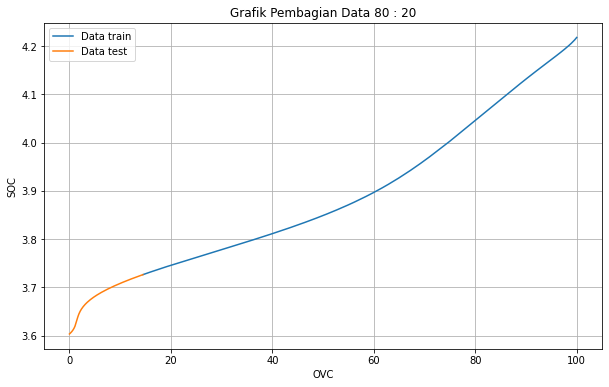

In [25]:
# split data
train =  df.iloc[:34776]
test = df.iloc[34776:]
n = len(series)
n_train = len(train)
n_test = len(test)

# plot untuk mengilustrasikan perbedaan train dan test set
plt.figure(figsize=(10, 6)), plt.plot(train, label='Data train')
plt.plot(test, label='Data test')
plt.xlabel('OVC'), plt.ylabel('SOC')
plt.title('Grafik Pembagian Data 80 : 20')
plt.legend(), plt.grid(), plt.show()


In [28]:
train.head()

,OCV
SOC,
100.000000,4.217655
99.998955,4.217641
99.997940,4.217627
99.996880,4.217613
99.995880,4.217598


In [29]:
test.head()

,OCV
SOC,
14.465157,3.726444
14.461395,3.726430
14.457634,3.726416
14.453857,3.726402
14.450050,3.726387


# CREATE MODEL FORCASTING WITH **ARIMA**

In [ ]:
import pmdarima as pm

# create automodel arima
# seasonal tidak ada pola musiman pada grafik
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=2,
                              start_q=0,
                              train = "adf",
                              seasonal= False,
                              trace= True,
                              stepwise=False)
    return automodel

**Keterangan**

Fungsi **arimamodel** di atas digunakan untuk membuat model ARIMA (Auto Regressive Integrated Moving Average). ARIMA merupakan salah satu metode yang sering digunakan dalam pemodelan data time series (data yang diurutkan berdasarkan waktu).

Model ARIMA dibuat dengan menggunakan fungsi **auto_arima** dari library pmdarima. Fungsi **auto_arima** digunakan untuk mencari model ARIMA terbaik untuk data time series yang diberikan dengan mencoba berbagai kombinasi parameter dan memilih yang terbaik berdasarkan beberapa metrik.

Fungsi **auto_arima** memiliki beberapa parameter yang dapat Anda gunakan untuk mengontrol bagaimana model ARIMA dibuat:
1. **start_p:** Nilai awal dari parameter p dari model ARIMA. Parameter p menentukan jumlah lag yang digunakan dalam model.
2.** start_q:** Nilai awal dari parameter q dari model ARIMA. Parameter q menentukan jumlah error yang digunakan dalam model.
3. **train:** Metode yang digunakan untuk melakukan uji validasi.
seasonal: Apakah model ARIMA harus menghandle data yang memiliki siklus musiman (seasonality). Jika diatur ke **True**, model akan menghandle siklus musiman dan sebaliknya jika diatur **false**.
4. **trace:** Apakah informasi debug harus ditampilkan saat model ARIMA dibuat. Jika diatur ke **True**, informasi debug akan ditampilkan.
5. **stepwise:** Apakah fungsi auto_arima harus mencoba semua kombinasi parameter atau hanya menggunakan metode stepwise. Jika diatur ke **True**, fungsi auto_arima akan menggunakan metode stepwise.

Setelah model ARIMA dibuat, fungsi **arimamodel** akan mengembalikan model tersebut ke caller. Anda kemudian dapat menggunakan model tersebut untuk melakukan prediksi atau mengevaluasi kinerjanya dengan menggunakan metode-metode yang tersedia dari objek model.

In [ ]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-766544.364, Time=14.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-768298.009, Time=27.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-769046.190, Time=76.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-764734.539, Time=44.41 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-766903.757, Time=57.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-761845.360, Time=77.95 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-766542.366, Time=20.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-767205.177, Time=30.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-767303.066, Time=38.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-763855.190, Time=53.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-765825.833, Time=65.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-766540.859, Time=29.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-767379.983, Time=41.55 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-766776.055, Time=47.11 sec
 ARIMA(2,1,3)(0,0,0)

**Best model:  ARIMA(0,1,2)**

Model ARIMA(0,1,2) merupakan model ARIMA yang terbaik untuk data time series yang diberikan. Parameter (0,1,2) menentukan konfigurasi dari model tersebut, yang terdiri dari 3 angka: p, d, dan q.

p adalah jumlah lag yang digunakan dalam model. Lag merupakan nilai dari data pada waktu sebelumnya. Jika p bernilai 0, model tidak menggunakan lag sama sekali.

d adalah degree of differencing. Degree of differencing adalah jumlah kali data di-differencing (diikuti dengan membuat data stationary) sebelum digunakan dalam model. Jika d bernilai 1, data di-differencing sekali sebelum digunakan dalam model.

q adalah jumlah error yang digunakan dalam model. Error merupakan selisih antara nilai aktual dan nilai yang diharapkan dari model. Jika q bernilai 2, model menggunakan 2 error dalam perhitungannya.
Jadi, model ARIMA(0,1,2) merupakan model yang tidak menggunakan lag sama sekali, menggunakan degree of differencing sebanyak 1 kali, dan menggunakan 2 error dalam perhitungannya.

Model ARIMA(0,1,2) dapat digunakan untuk memprediksi nilai data time series pada waktu yang akan datang dengan menggunakan nilai-nilai yang telah lalu dan error-error dari model tersebut. Anda juga dapat mengevaluasi kinerja model dengan menggunakan metode-metode yang tersedia dari objek model, seperti mean squared error (MSE) atau mean absolute error (MAE).






# **DO FORECAST**

In [ ]:
# mengetahui jumlah data test
test.shape

(8694, 1)

In [ ]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


34776    3.726440
34777    3.726423
34778    3.726405
34779    3.726387
34780    3.726369
           ...   
43465    3.571619
43466    3.571601
43467    3.571583
43468    3.571566
43469    3.571548
Length: 8694, dtype: float64

**Keterangan**

Code di atas digunakan untuk melakukan prediksi menggunakan model ARIMA yang telah dibuat sebelumnya.

Pertama, fungsi predict dari objek automodel (yang merupakan objek model ARIMA) dipanggil dengan parameter n_periods yang diberikan nilai test.shape[0]. Parameter n_periods menentukan jumlah periode yang ingin diprediksi. Nilai test.shape[0] merupakan jumlah baris dari objek test, sehingga fungsi predict akan melakukan prediksi sebanyak jumlah baris dari test.

Hasil dari fungsi predict kemudian disimpan dalam variabel predictions_arima. Variabel ini merupakan numpy array yang berisi nilai-nilai yang diprediksi oleh model.

Setelah itu, variabel predictions_arima ditampilkan dengan perintah predictions_arima. Ini akan menampilkan nilai-nilai yang diprediksi oleh model ARIMA. Anda dapat menggunakan nilai-nilai tersebut untuk mengevaluasi kinerja model atau untuk tujuan lain yang diinginkan.

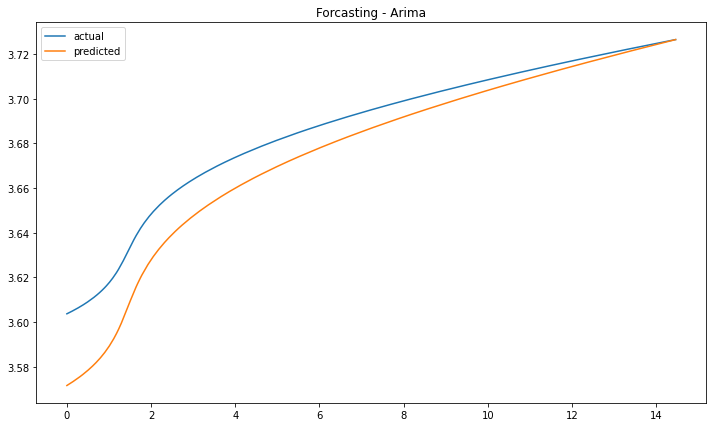

In [ ]:
# plot untuk mengilustrasikan perbedaan actual dan predictons
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label = 'actual')
pyplot.plot(test.index, predictions_arima, label = 'predicted')
pyplot.title('Forcasting - Arima')
pyplot.legend()

Dari grafik diatas kita bisa ketahui bahwa hasil prediksi bagus karena semakin lama semakin dekat selisih antara nilai actaul dan predicted, permasalahnya pada awal bekerja hasil nilai predicted memiliki selisih yang sangat jauh dengan nilai actual. kesimpulanya metode automodel arima ini cukup bagus digunakan karena semakin lama selisih antara nilai actual dengan predicted semakin kecil.

In [ ]:
predictions_arima.head()

34776    3.726440
34777    3.726423
34778    3.726405
34779    3.726387
34780    3.726369
dtype: float64

In [ ]:
predictions_arima.tail()

43465    3.571619
43466    3.571601
43467    3.571583
43468    3.571566
43469    3.571548
dtype: float64

# **EValuate**

In [ ]:
from math import sqrt

In [ ]:
# Evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions_arima))
print('TEST RMSE: %.3f' % rmse)

TEST RMSE: 0.019


Hasil evalusai rmse menujukan bahwa forcanting yang sudah dilakukan ini mempunyai tingkat akurasi baguss dibuktikan dengan rmse 0,019 karena apbila hasil menunjukan nilai rmse besar forcasting tersebut mempunyai tingkat akurat yang rendah